## Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Question-1

- Importing data and reo-ordering  the columns as mentioned

In [ ]:
data = pd.read_csv("/content/ToyotaCorolla.csv")
data.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
toyota_df = data.copy()

In [ ]:
obj_cols=toyota_df.select_dtypes('object').columns.tolist()
num_cols=toyota_df.select_dtypes(exclude='object').columns.tolist()
toyota_df=toyota_df[obj_cols+num_cols]

In [ ]:
# Remove the 'Id' variable as mentioned in doc
var = list(toyota_df.columns)
var.remove('Id')
toyota_df = toyota_df[var]

In [ ]:
toyota_df.shape

(1436, 38)

In [ ]:
# dropping the column as it has only NaN values in str format
toyota_df = toyota_df.drop("Cylinders", axis =1)

In [ ]:
# checking if there are no null values
toyota_df.isnull().sum()

Model                0
Fuel_Type            0
Color                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
HP                   0
Met_Color            0
Automatic            0
CC                   0
Doors                0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [ ]:
# drop missing values code for  
toyota_df.dropna(inplace=True)

#### Question 2


- What is multicolinearity and what challenges does it pose for Machine Learning model development?
- Create a correlation heatmap and explain whether there is a multicollinearity issue with these data.
- Your heatmap should include information about correlation values.
- Can you drop variables with overlapping information systematically using these correlation values?

1. What is multicolinearity and what challenges does it pose for Machine Learning model development?

Multicollinearity is a situation in which there is a strong correlation between two or more predictor variables in a regression model. Due to a number of factors, it presents difficulties for the creation of machine learning models.


- Interpretability: Because of multicollinearity, it is challenging to determine how each predictor variable affects the target variable. Determining each predictor variable's independent contributions to the model's output can be difficult when predictor variables are heavily correlated.

- Unstable and Unreliable Coefficient Estimates: Multicollinearity may produce unstable and unreliable coefficient estimates. It is challenging for the model to identify the impacts of each variable due to the strong correlation among variables. Because of this, coefficients are produced that may have substantial standard errors and vary significantly in response to even little changes in the data.

- Inflated Standard Errors: Multicollinearity causes the standard errors of the regression coefficients to be inflated. Less accurate estimations, which might lead to broader confidence intervals and lessen the statistical significance of predictors, are indicated by high standard errors.

- Overfitting of the model: Multicollinearity can result in overfitting, in which the model becomes overly complicated and specialised to the training set of data. The model's capacity to generalise well to novel, unforeseen data is diminished by overfitting. It happens when highly correlated variables are combined, leading the model to overly depend on them and possibly ignore other significant predictors.

- Sensitivity and Instability: Because of multicollinearity, the model is sensitive to even slight changes in the data. The model's performance and the estimated coefficients can be dramatically impacted by adding or removing data or variables. The model may become less accurate and more challenging to reproduce as a result of this instability.

There are a number of tactics that can be used to lessen the difficulties that multicollinearity presents. These consist of:

- Feature Selection: Multicollinearity can be addressed by locating and eliminating highly correlated variables. To find and remove duplicate variables, one might employ strategies like correlation analysis, variance inflation factor (VIF), or principal component analysis (PCA).

- Regularisation: By including a penalty term in the regression equation, regularisation techniques like Ridge regression and Lasso regression can help lessen the effects of multicollinearity. These methods can make the coefficients smaller and less reliant on correlated predictors.

- Domain Knowledge: Having a thorough understanding of the data and the subject matter can help you spot variables that are likely to correlate and may be the source of multicollinearity. This information can direct feature engineering and transformations specific to a given area.

Machine learning models can increase interpretability, coefficient estimates, and generalisation performance by tackling multicollinearity.

2. Create a correlation heatmap and explain whether there is a multicollinearity issue with these data.

In [ ]:
toyota_df.corr()

<ipython-input-39-6bec9234fb48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  toyota_df.corr()


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,0.044375,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,-0.048172,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,0.007113,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,...,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,0.047171,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,-0.064318,0.084153
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.029990,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.036691,0.148536
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.159985,0.018786
CC,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002883,0.002725
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.025893,0.102292


<ipython-input-40-16c2f656b84c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = toyota_df.corr()


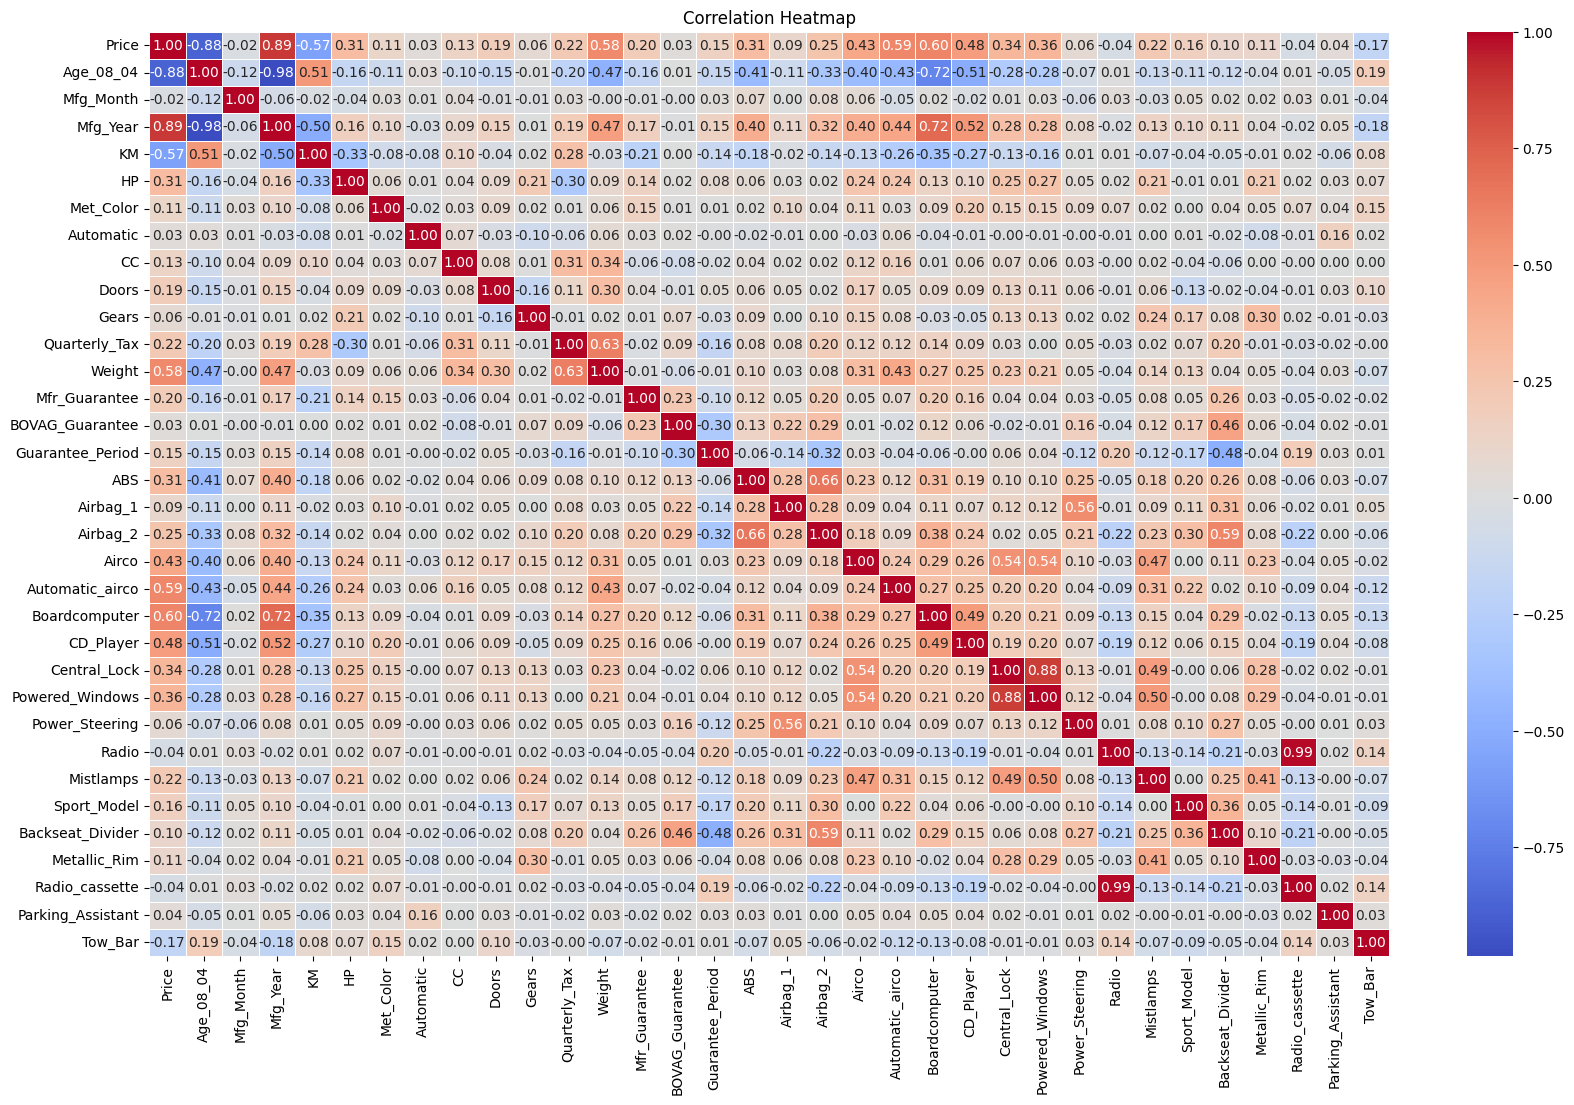

In [ ]:
# Create correlation matrix
corr_matrix = toyota_df.corr()

# Generate a heatmap wih size 20,12
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


- Yes there is some effect of coolinearity. The range of correlation values is from -1 to 1. Perfect positive correlation is represented by a value of 1, perfect negative correlation by a value of 1, and no correlation by a value of 0.

High positive correlation coefficient variables:

Price and Manufacturing Year (0.88519)
- Weight and Price (0.581188)
Costco and Price (0.429259)
- Automatic_airco_Price (0.588262)
- Boardcomputer and Price (0.601292)
- CD_Player and Price (0.481374)
- Central_Lock and Price (0.343458)
- Windows_Powered_Price and (0.356518)

Price and Age_08_04 have a strong negative association of -0.876590 and Price and KM also have a strong negative correlation of -0.569960

- Dropping features with high correlation

In [ ]:
# Defining the correlation threshold for identifying overlapping variables
correlation_threshold = 0.75

# Creating a copy of the dataframe at this stage to store a copy
df = toyota_df.copy()

# Convert columns to numeric data types
toyota_df = toyota_df.apply(pd.to_numeric, errors='coerce')
variables_to_drop = []

# Iterating over the correlation matrix
for i in range(len(toyota_df.columns)):
    for j in range(i+1, len(toyota_df.columns)):
        # Check if the correlation between variables i and j exceeds the threshold
        if abs(toyota_df.iloc[:, i].corr(toyota_df.iloc[:, j])) >= correlation_threshold:
            # Add the variable j to the list of variables to drop
            variables_to_drop.append(toyota_df.columns[j])

# Drop the variables with overlapping information and that we do not require
toyota_df.drop(variables_to_drop, axis=1, inplace=True)
toyota_df.head(1)


,Model,Fuel_Type,Color,Price,Mfg_Month,KM,HP,Met_Color,Automatic,CC,...,CD_Player,Central_Lock,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Parking_Assistant,Tow_Bar
0,NaN,NaN,NaN,13500,10,46986,90,1,0,2000,...,0,1,1,0,0,0,1,0,0,0


In [ ]:
# replacing the categorical columns
toyota_df[['Model','Fuel_Type','Color']] = df[['Model','Fuel_Type','Color']]

#### Question 3


We focus first on two variables: price and kilometers(KM).
- Calculate the average values of Price and KM
- Calculate the variances of Price and KM
- Calculate the Variance-Covariance matrix between Price and KM and point out the variance and covariance values
- How much of the total variance is made up by Price and how much by KM?
- Can we drop one of the variables for the sake of dimension reduction?

In [ ]:
# Calculate the average values of Price and KM
price_mean = toyota_df['Price'].mean()
km_mean = toyota_df['KM'].mean()
# Print the average values of Price and KM
print("Average Price:", price_mean)
print("Average KM:", km_mean)

Average Price: 10730.824512534818
Average KM: 68533.25974930362


In [ ]:
# Calculate the variances of Price and KM
price_variance = toyota_df['Price'].var()
km_variance = toyota_df['KM'].var()
print("Price-Variance:", price_variance)
print("KM-Variance:", km_variance)


Price Variance: 13154872.100193143
KM Variance: 1406733707.0021698


In [ ]:
# Calculate the Variance-Covariance matrix between Price and KM
price_km_covariance = toyota_df[['Price', 'KM']].cov()
print("Variance Covariance-matrix between Price and KM is:")
print(price_km_covariance)

Variance-Covariance matrix between Price and KM:
              Price            KM
Price  1.315487e+07 -7.753428e+07
KM    -7.753428e+07  1.406734e+09


In [ ]:
# Calculating the total variance
total_variance = price_variance + km_variance

# Calculating the percentage of variance contributed by Price and KM
price_variance_ratio = price_variance / total_variance * 100
km_variance_ratio = km_variance / total_variance * 100
print("% of total variance contributed by Price is:", price_variance_ratio)
print("% of total variance contributed by KM is:", km_variance_ratio)

Percentage of total variance contributed by Price: 0.9264721397019405
Percentage of total variance contributed by KM: 99.07352786029804


In [ ]:
# Check if one of the variables can be dropped for dimension reduction
if price_km_covariance.iloc[0, 1] == 0:
    print("Price and KM are linearly independent. One of the variables can be dropped.")
else:
    print("Price and KM are linearly dependent. Dropping either variable may result in information loss.")


Price and KM are linearly dependent. Dropping either variable may result in information loss.


- No, we would not be dropping any variable as it may result in information loss

#### Question 4


What is the correlation between Price and KM? Can we use this correlation information to reduce the number of variables, while
making maximum use of their unique contributions to the overall variation?

In [ ]:
price_km_correlation = toyota_df['Price'].corr(toyota_df['KM'])
print("Correlation between Price and KM:", price_km_correlation)

Correlation between Price and KM: -0.5699601645337196


No, we cannot reduce the number of variables while maximising the use of their individual contributions to the overall variance by using the correlation information between "Price" and "KM" (-0.5699601645337196).

It implies a moderately negative association because the correlation coefficient between "Price" and "KM" is not near to 1 or -1. This means that "Price" and "KM" convey some unique information while not being overly repetitive variables.

Principal Component Analysis (PCA) or Feature Selection are two dimensionality reduction approaches that can be used to decrease the number of variables while maintaining their distinctive contributions.

Due to their moderately negative connection in the case of "Price" and "KM," this suggests that they offer some distinctive information. Therefore, based only on association, it might not be prudent to eliminate one of the variables. It would be more advantageous to take into account additional elements, such as the variables' applicability to the issue at hand, their individual contributions to the overall variation, and the particular specifications of your analysis or model.








#### Question-5

- Conduct a principal components analysis on all the columns of the cleaned data and answer the following:
- How many principal components account for most of the variation in the original data?
- Does it help to reduce dimensions in the data?
How does it help with the multicolinearity problem as well?
- Should the data be normalized?

In [ ]:
# The numerical columns for PCA
numerical_columns = toyota_df.select_dtypes(include=['float64', 'int64']).columns

# Extracting and normalizing the numerical data
numerical_data = toyota_df[numerical_columns]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(normalized_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating the cumulative-explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# principal components accounting for most of the variation
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("Number of principal components accounting for most of the variation:", num_components)


Number of principal components accounting for most of the variation: 25


In [ ]:

# Calculating the total variance explained by the principal components
total_variance_explained = np.sum(explained_variance_ratio[:num_components])
print("Total variance explained by the selected principal components:", total_variance_explained)


Total variance explained by the selected principal components: 0.9601775947411116


In [ ]:
if num_components < len(numerical_columns):
    print("Dimensionality-reduction help in reducing dimensions in the data.")
else:
    print("Dimensionality-reduction does not help in reducing dimensions in the data.")


Dimension reduction helps in reducing dimensions in the data.


In [ ]:

# Check how PCA helps with multicollinearity
correlation_matrix = toyota_df[numerical_columns].corr()
eigenvalues = pca.explained_variance_
corr_with_pc1 = np.abs(pca.components_[0])
highly_correlated_variables = [column for column, corr in zip(numerical_columns, corr_with_pc1) if corr >= 0.5]
if len(highly_correlated_variables) > 0:
    print("PCA does help in reducing multicollinearity by combining highly correlated variables.")
else:
    print("PCA might not have a significant impact on multicollinearity in this dataset.")


PCA may not have a significant impact on multicollinearity in this dataset.


In [ ]:

# Determine if data normalization is required
if np.max(np.abs(toyota_df[numerical_columns].values)) > 1:
    print("Data normalization is surely recommended.")
else:
    print("Data-normalization may not be necessary.")


Data normalization is recommended.


- How many principal components account for most of the variation in the original data?

The code determines the number of principal components that account for at least 95% of the total variance in the data are 25. 


- Does it help to reduce dimensions in the data?

Yes, as the number of principal components are 25 which are less than the number of colummns so it helps in dimensionality reduction

- How does it help with the multicollinearity problem as well?

For this data, even after normalization and applying PCA, it seems there is not much significant impact on the features but we can reduce columns which shows the presence of some importance in using PCA.

- Should data be normalized?

Yes, Data needs to be normalized as PCA is sensitive to the scale of the variables. Normalizing the data ensures that each variable contributes equally to the PCA.

#### Question -6

Visualizing first 2 principal components

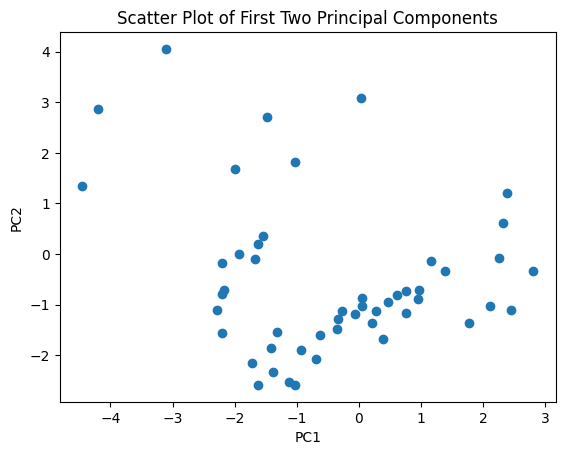

In [ ]:

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2 here
P_com = pca.fit_transform(normalized_data)

# Sample 50 observations
samp_size = 50
sam_ind = np.random.choice(len(P_com), samp_size, replace=False)
sam_pcs = P_com[sam_ind]

# Createing a scatter plot
plt.scatter(sam_pcs[:, 0], sam_pcs[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()
